In [202]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [203]:
df = pd.read_csv('PlanePrice.csv')
df.head(10)

,Model Name,Engine Type,HP or lbs thr ea engine,Max speed Knots,Rcmnd cruise Knots,Stall Knots dirty,Fuel gal/lbs,All eng rate of climb,Eng out rate of climb,Takeoff over 50ft,Landing over 50ft,Empty weight lbs,Length ft/in,Wing span ft/in,Range N.M.,Price
0,100 Darter (S.L. Industries),Piston,145,104,91.0,46.0,36,450,900.0,1300.0,"2,050","1,180",25/3,37/5,370,1300000.0
1,7 CCM Champ,Piston,85,89,83.0,44.0,15,600,720.0,800.0,"1,350",820,20/7,36/1,190,1230000.0
2,100 Darter (S.L. Industries),Piston,90,90,78.0,37.0,19,650,475.0,850.0,"1,300",810,21/5,35/0,210,1600000.0
3,7 AC Champ,Piston,85,88,78.0,37.0,19,620,500.0,850.0,"1,300",800,21/5,35/0,210,1300000.0
4,100 Darter (S.L. Industries),Piston,65,83,74.0,33.0,14,370,632.0,885.0,"1,220",740,21/5,35/0,175,1250000.0
5,PA-60-700P Aerostar (preliminary),Piston,65,78,72.0,33.0,15,360,583.0,880.0,"1,250",786,20/4,36/1,180,1100000.0
6,PA-601P pressurized Aerostar ('77 service ceil...,Piston,350,264,230.0,80.0,165,"1,820",3080.0,2100.0,"6,315","4,275",34/10,36/8,868,2500000.0
7,100 Darter (S.L. Industries),Piston,290,262,247.0,77.0,165,"1,755",2250.0,2076.0,"6,000","4,125",34/9,36/7,"1,020",2800000.0
8,"PA-601, 601A, turbochg Aerostar",Piston,290,257,235.0,77.0,165,"1,460",2490.0,2030.0,"6,000","4,056",34/10,36/8,"1,101",2500000.0
9,100 Darter (S.L. Industries),Piston,290,257,237.0,77.0,165,"1,460",2490.0,2030.0,"6,000","3,958",34/10,36/8,"1,174",3000000.0


In [204]:
df.shape

(517, 16)

In [205]:
df.fillna(0)
df.dropna()
df['Price'].value_counts()

Price
4500000.0    27
2000000.0    23
2500000.0    23
4100000.0    20
1600000.0    13
             ..
700000.0      1
1230000.0     1
2250000.0     1
1820000.0     1
3160000.0     1
Name: count, Length: 177, dtype: int64

# حذف داده های تکراری 

In [206]:
df.drop_duplicates(inplace=True)
df = df.dropna( )

# تبدیل داده های کتگوری به عددی

In [207]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column in df.select_dtypes(include=['object']):
    df[column] = le.fit_transform(df[column])

In [208]:
x = df.drop('Price' , axis= 1)
y = df['Price']

In [209]:
from sklearn.preprocessing import StandardScaler

md = StandardScaler()
x = md.fit_transform(x)

In [210]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2)

In [211]:
print(f'Features => Train : {x_train.shape} , Test : {x_test.shape}')
print(f'Label => Train : {y_train.shape} , Test : {y_test.shape}')

Features => Train : (336, 15) , Test : (85, 15)
Label => Train : (336,) , Test : (85,)


In [212]:
from sklearn.metrics import accuracy_score , f1_score

def cal_metrics(y_train , y_test ,  y_pred_train , y_pred_test):
     acc_train = accuracy_score(y_true=y_train , y_pred=y_pred_train)
     acc_test = accuracy_score(y_true=y_test , y_pred=y_pred_test)
     fscore = f1_score(y_true=y_test , y_pred=y_pred_test , average='macro')
  

     print(f'acc_train : {acc_train} - acc_test : {acc_test} - Fscore : {fscore}')
    
     return acc_train , acc_test , fscore

# Naive Beyes 

In [213]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train , y_train)

GaussianNB()

In [214]:
y_pred_train = nb.predict(x_train)
y_pred_test = nb.predict(x_test)

acc_train_nb , acc_test_nb , fscore_nb = cal_metrics(y_train , y_test ,  y_pred_train , y_pred_test)

acc_train : 0.7232142857142857 - acc_test : 0.15294117647058825 - Fscore : 0.06043360433604336


# Association Rule Mining


In [215]:
#از این الگوریتم در این پروژه نمیتوان استفاده کرد زیرا ما در ابتدا
# فیچر های تکراری را پاک کرده ایم و این الگوریتم به فیچر های تکراری نیاز دارد  

# LSTM 

In [216]:
# این الگوریتم برای شبکه های عصبی و دیپ لرنینگ استفاده میشود 

# GAN  

In [217]:
# این الگوریتم برای شبکه های عصبی و دیپ لرنینگ استفاده میشود  

# KNN

In [218]:
from sklearn.neighbors import KNeighborsClassifier


knn = KNeighborsClassifier( n_neighbors= 3) 
knn.fit(x_train , y_train)

KNeighborsClassifier(n_neighbors=3)

In [219]:
y_pred_train = knn.predict(x_train)
y_pred_test = knn.predict(x_test)

In [220]:
acc_train_knn , acc_test_knn , fscore_knn = cal_metrics(y_train , y_test ,  y_pred_train , y_pred_test)

acc_train : 0.4166666666666667 - acc_test : 0.16470588235294117 - Fscore : 0.07890137328339575


# Self Training - KNN

In [221]:
from sklearn.semi_supervised import SelfTrainingClassifier
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors= 5)
st = SelfTrainingClassifier(knn)
st.fit(x_train,y_train)

c:\Users\Amirreza\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\semi_supervised\_self_training.py:227: UserWarning: y contains no unlabeled samples
  warnings.warn("y contains no unlabeled samples", UserWarning)


SelfTrainingClassifier(base_estimator=KNeighborsClassifier())

In [222]:
y_pred_train = st.predict(x_train)
y_pred_test = st.predict(x_test)

In [223]:
acc_train_st , acc_test_st , fscore_st = cal_metrics(y_train , y_test , y_pred_train , y_pred_test)

acc_train : 0.3273809523809524 - acc_test : 0.15294117647058825 - Fscore : 0.06179775280898876


# Hierarchical Clustering


In [224]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage


# Gradiant Boosting 

In [225]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb.fit(x_train, y_train)

GradientBoostingRegressor(random_state=42)

In [226]:
y_pred_train = gb.predict(x_train)
y_pred_test = gb.predict(x_test)

In [227]:
from sklearn.metrics import mean_squared_error , r2_score

train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
r2 = r2_score(y_train , y_pred_train)
r22 = r2_score(y_test , y_pred_test)
train_mse , test_mse , r2 , r22

(12662773651.831272,
 55294465375.874916,
 0.9861389524977673,
 0.9364620668449576)

# Decision Tree 

In [228]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=64 , criterion = 'gini')
dt.fit(x_train , y_train)

DecisionTreeClassifier(max_depth=64)

In [229]:
y_pred_train = dt.predict(x_train)
y_pred_test = dt.predict(x_test)

In [230]:
acc_train_dt , acc_test_dt , fscore_dt = cal_metrics(y_train , y_test , y_pred_train , y_pred_test)

acc_train : 1.0 - acc_test : 0.15294117647058825 - Fscore : 0.08124253285543608


# Logistic Regression

In [231]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train , y_train)

LogisticRegression()

In [232]:
y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)

In [233]:
acc_train_lr , acc_test_lr , fscore_lr = cal_metrics(y_train , y_test , y_pred_train , y_pred_test)

acc_train : 0.44642857142857145 - acc_test : 0.15294117647058825 - Fscore : 0.05739320920043812


# ann

In [234]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes= 128 , max_iter= 200)
model.fit(x_train , y_train)

c:\Users\Amirreza\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=128)

In [235]:
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

In [236]:
acc_train_ann , acc_test_ann , fscore_ann = cal_metrics(y_train , y_test , y_pred_train , y_pred_test)

acc_train : 0.7321428571428571 - acc_test : 0.18823529411764706 - Fscore : 0.09641629847815415


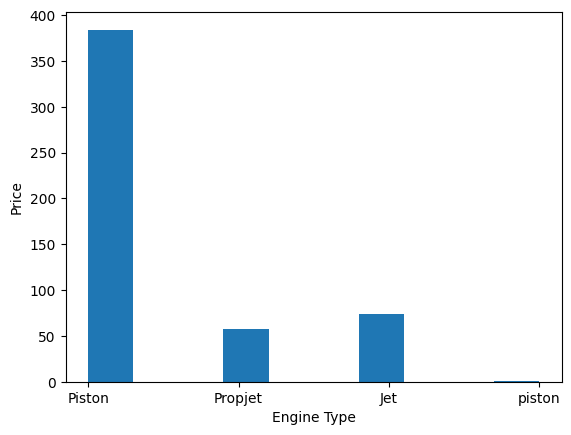

In [237]:
df1 = pd.read_csv('PlanePrice.csv')
x = df1['Engine Type']
y = df1['Price']


plt.hist(x ,bins = 10)
plt.xlabel('Engine Type')
plt.ylabel('Price')
plt.show()

In [239]:
df1.head()

,Model Name,Engine Type,HP or lbs thr ea engine,Max speed Knots,Rcmnd cruise Knots,Stall Knots dirty,Fuel gal/lbs,All eng rate of climb,Eng out rate of climb,Takeoff over 50ft,Landing over 50ft,Empty weight lbs,Length ft/in,Wing span ft/in,Range N.M.,Price
0,100 Darter (S.L. Industries),Piston,145,104,91.0,46.0,36,450,900.0,1300.0,"2,050","1,180",25/3,37/5,370,1300000.0
1,7 CCM Champ,Piston,85,89,83.0,44.0,15,600,720.0,800.0,"1,350",820,20/7,36/1,190,1230000.0
2,100 Darter (S.L. Industries),Piston,90,90,78.0,37.0,19,650,475.0,850.0,"1,300",810,21/5,35/0,210,1600000.0
3,7 AC Champ,Piston,85,88,78.0,37.0,19,620,500.0,850.0,"1,300",800,21/5,35/0,210,1300000.0
4,100 Darter (S.L. Industries),Piston,65,83,74.0,33.0,14,370,632.0,885.0,"1,220",740,21/5,35/0,175,1250000.0


ValueError: could not convert string to float: 'Piston'

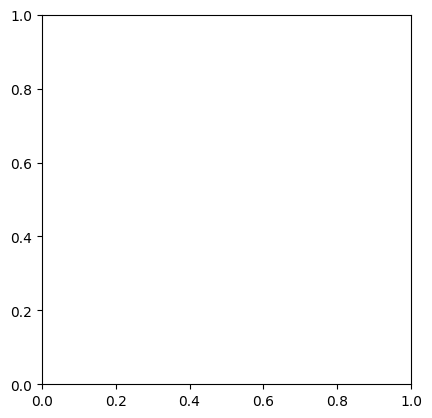

In [248]:
y = df1['HP or lbs thr ea engine']
x = df1['Engine Type']

plt.bar(x ,y)
plt.show()